# COVID Related Death Predictions

---
## Abstract
---

---
## Introduction
---

The Novel Coronavirus, known as COVID19, has been sweeping across the world throughout 2020. Throughout the year, researchers have been scrambling to try and identify which groups of the population are most at risk. They have done a great job of identifying major risk factors that impact the toll COVID19 may take on a particular person. The major risk factors we have heard about in the news have been Age, Obesity, and Heart Disease, but there may be more. We have also seen that a person's chances for success in a battle with COVID19 often are dictated by the health care available to them. But how much of an impact do all of these factors individually have in dictating your standing against COVID19? And what if more than one of these factors apply to you? <br>

---
## Motivation
---

Many people don't understand the severity of COVID19 and therefore aren't taking proper precautions. In countries like the United States, this has been a great hinderance in controlling the spread of COVID19. People are used to hearing things like "If you are Obese then you are high risk if you get COVID" or "If you have Heart Disease then you are at high risk if you get COVID". However, for many people, it is hard to understand the severity from such a stand alone statement. However, maybe hearing something similar to "Out of X number of people with the exact set of risk factors that you have, Y of them died" may strike more interest and belief.<br>
Another motivation for this project is that being able to estimate the probability of death for a given patient may be very useful in a hospital that is overwhelmed with patients. It may help is deciding where to send certain resources, and to anticipate which patients are likely to need resources throughout their treatment.

---
## Data
---

This data set came from a Mexican Government [website](https://www.gob.mx/salud/documentos/datos-abiertos-152127). I found a link to this dataset in a [kaggle](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset) project that somebody has done. I thought that finding COVID data would be easier than this, but it turns out that HIPPA laws do not allow data on the individual patient level to be made available to the public even if their names are left out. Therefore, only summary level data sets (like by county, or by age group) are able to be viewed by the public. This data set from the Mexican Government is at the individual patient level and doesn't provide any patient identification information.

### Binary Qualitative Features

<b>Yes or No Features: </b>The presence of Pneumonia, Pregnancy, Diabetes, Chronic Obstructive Pulmonary Disease (COPD), Asthma, Immunosuppression, Hypertension, Cardiovascular Disease, Obesity, Kidney Failure, Other Diseases (umbrella feature), and whether the person is a smoker. Whether or not Intubation was required, and whether or not Intensive Care was required. Lastly, the <b>target variable "Died"</b> is a yes or no feature.

<b> Non Yes or No Features: </b>The Sex of the person (either Male of Female). The Type of Care given (either Ambulatory or Hospitalization). The Origin of the person (whether they are from Mexico or another country). For interpretability, I have turned each of these into two separate dummy variables.

### Non-Binary Qualitative Features

Which Sector the person was admitted to (Red Cross for example). The Entity (state) the sector is located in. The Entity (state) the person resides in. The Entity (state) the person was born in. Sector has been encoded into 13 dummy variables. The Entity features have been grouped into three subgroups as a function of the death rates and then encoded into three dummy variables.

### Continuous Feature

The persons Age.

---
## Related Work
---

With COVID sweeping across the world, there are a lot of studies being done on COVID. The CDC in the United States is constantly posting updated data on COVID cases and deaths in the United States. However, all of the data available through the CDC is only at an aggregated level, meaning they only report numbers by some grouping such as state. They are very good about reporting all sorts of risk factors with the accompanied proportions of deaths and cases across these risk factors. Common risk factors presented are cardiovascular disease, age, as well as other risk factors. I'm also sure that hospitals have been utilizing their data collected from COVID cases so far in attempts to better manage the patient flow while experiencing higher than normal volume due to COVID. Lastly, I had found out about this data set through a Kaggle project found [here](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset) where the author uses this dataset in order to predict whether someone will require intensive care (ICU) based on their underlying risk factors. To preserve originality, I decided to predict death rather than ICU.

## Proposed Method

Among many different machine learning classification technique, Logistic Regression and Decision Tree Analysis are explored in this project. Logistic Regression is a strong and very often used analysis tool for predicting binary outcomes, especially in the medical field. Since a motivation for this project is hospital use, Logistic Regression is a technique that many workers would likely recognize and feel more comfortable with. <br>
Decision Tree analysis seems like a good analysis method to explore since one of the motivations for this project is easy interpretation for people that may not understand the impact COVID may have on them. <br>
These models will be developed using training data that consists of 95% of the data available. After performing cross validation on the proposed models, the final chosen Logistic Regression and Decision Tree models will be tested using the remaining 5% of the data that was set aside as test data.

#### Variables to Consider

For completeness, I would like to initially consider all of the features listed in the Data section above. Below you can see each variable and the associated Death Rate for that specific group of people.

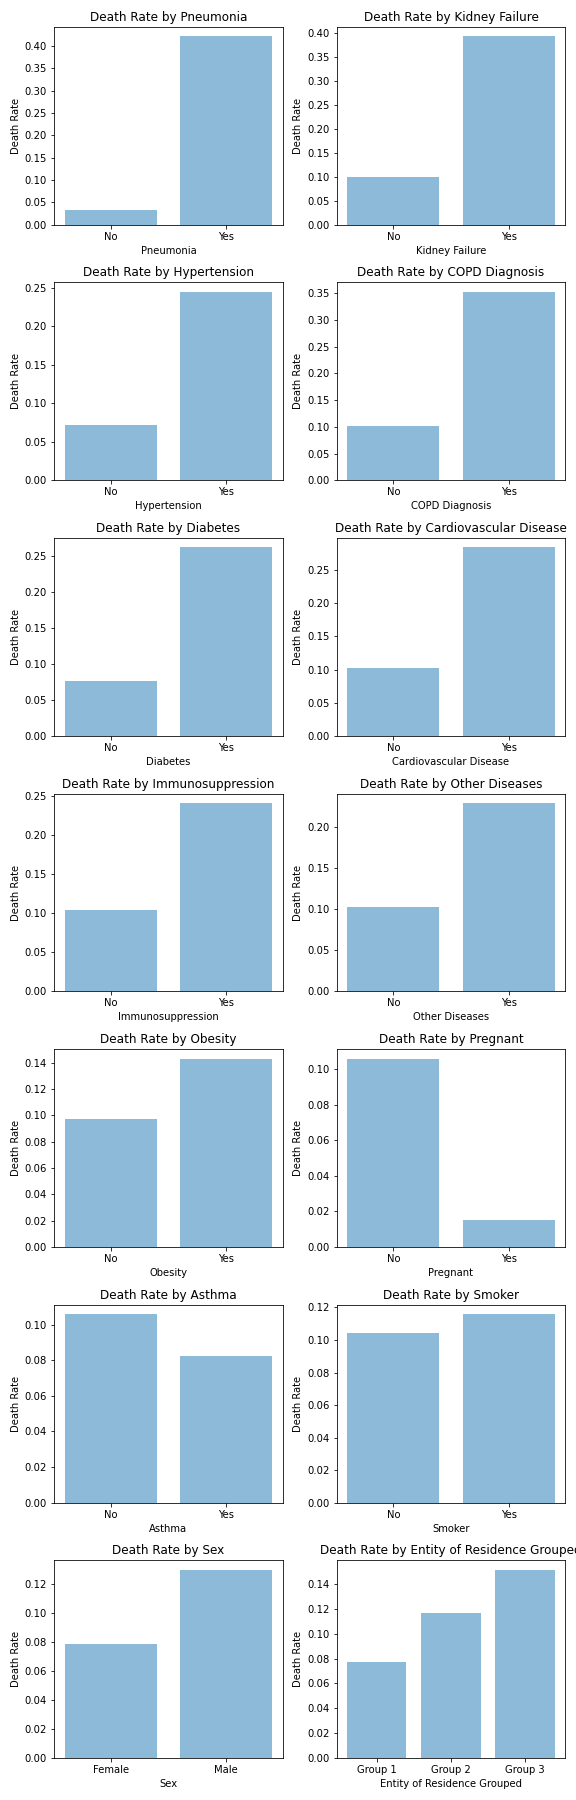

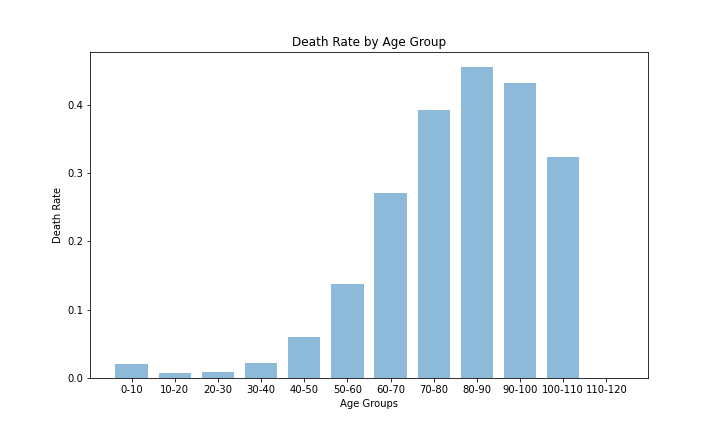

<b>Figure 1:</b> The above plots show that by far, having pneumonia is associated with the highest increase in death rates. Interestingly, being pregnant appears to have a benefit for the death rate. This may be because being pregnant attracts more medical attention since they are actually working to save two lives instead of one. Another interesting thing is that people with asthma appear to have a slightly lower death rate than those without asthma. Also, being a smoker seems to have very little impact on the death rate. Being a male also seems to increase the death rate. Lastly, there are different death rates depending on which entity (state) someone lives in. I have a hunch that this may be due to difference in the quality of health care across the country. Lastly, the age seems like a good predictor and we can see how rapidly the death rate spikes as increases after the age of 50. It is interesting how the death rate lowers after the age of 100 though.

---
## Experiments
---
#### All model experimentation can be found <b>INSERT LINK TO NOTEBOOK HERE</b>

### Logistic Regression Model

<b>Feature Selection: </b><br>
<b>Using Forward Stepwise Selection</b>, I found that out of the 18 possible features, only 4 are necessary to acheive a model with classification accuracy comparable to the maximum estimated test classification rate. This model has an estimated test classification rate of 90.76%. The estimated test errors were calculated using 10-fold cross validation on the training data. The fitted model is shown in the table.

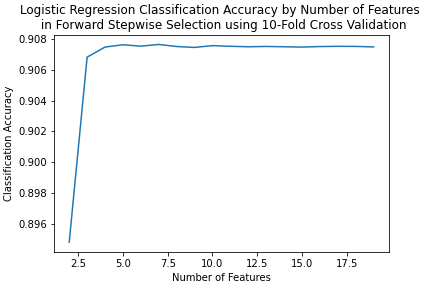

<b>Figure 2: </b>This plot shows the different levels of estimated test accuracy obtained for logistic regression models of different complexities in terms of the number of features obtained from forward stepwise feature selection. Estimated test accuracy was obtained by performing 10-fold cross validation for each model. After the 4 best features have been added, the estimated test accuracy no longer increases, suggesting a model with 4 features is the simplest model for achieving test accuracy.

The model selected using forward stepwise feature slection is shown below:

| Feature        | Coefficient |
|----------------|:-----------:|
| Pneumonia      | 2.492       |
| Age            | 0.061       |
| Kidney Failure | 1.132       |
| Sex_1 (Female) | -0.427      |

<b>Using Backward Stepwise Selection</b>, I selected only the best 7 features to keep. This model has an estimated test accuracy of 89.9%. The estimated test errors were calculated using 10-fold cross validation on the training data.

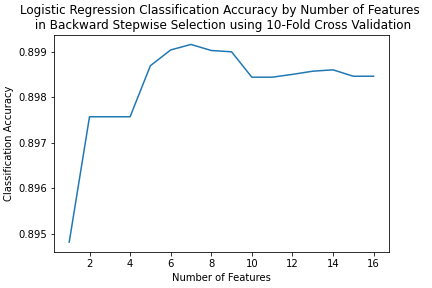

<b>Figure 3: </b>This plot shows the different levels of estimated test accuracy obtained for logistic regression models of different complexities in terms of the number of features obtained from back stepwise feature selection. Estimated test accuracy was obtained by performing 10-fold cross validation for each model. The maximized estimated test accuracy is found from a model containing 7 features. Any model with less than 7 features is estimated to have substantially less test accuracy.

The model selected using backward stepwise feature selection is shown below:

| Feature       | Coefficient |
|---------------|:-----------:|
|Pneumonia      | 2.842       |
|Pregnant       | -1.286      |
|COPD Diagnosis | 0.825       |
|Hypertension   | 0.940       |
|Kidney Failure | 0.914       |
|Sex_1 (Female) | -1.429      |
|Sex_2 (Male)   | -0.990      |

<b>L2 Regularization: </b>When training a logistic regression model using the L2 addition to the cost function as a function of C, the maximized accuracy from 10-fold cross validation is found when C = 0. However, using a C of as low as 0.001 still yields comparable estimated test accuracy of 90.7%. The chart below shows the accuracy of the model as a function of C (ranging from 10 raised to the power of -11 to 9).

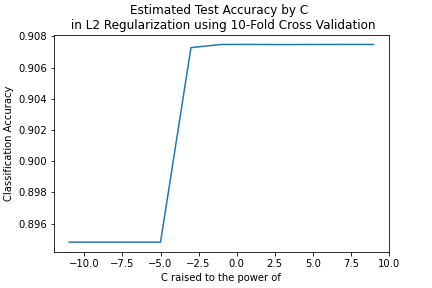

<b>Figure 4:</b> The figure above shows how changing the value of C, the addition to the cost function when fitting logistic regression, impacts the estimated test error of the logistic regression model containing all available features. We can see that using a C less than or equal to 0.00001 lowers the estimated test accuracy by about 1.2%. Increasing the value of C anywhere above 0.001 has very minimal impact on the estimated test accuracy.

The model that uses C = 0.001 contains:

| Feature           | Coefficient |
|-------------------|:-----------:|
| Pneumonia         | 2.171       |
| Age               | 0.058       |
| Pregnant          | 0.005       |
| Diabetes          | 0.358       |
| COPD Diagnosis    | 0.095       |
| Asthma            | -0.037      |
| Immunosuppression | 0.186       |
| Hypertension      | 0.226       |
| Other Diseases    | 0.346       |
| Cardiovascular Disease  | -0.014 |
| Obesity           | 0.257       |
| Kidney Failure    | 0.585       |
| Smoker            | -0.066      |
| Sex_1 (Female)    | -0.233      |
| Sex_2 (Male)      | 0.228       |
| Residence_1       | -0.142      |
| Residence_2       | -0.014      |
| Residence_3       | 0.151       |

<b>Comparison of Feature Selections: </b>The only features that the forward stepwise selection and backward stepwise selection have in common are Pneumonia, Kidney Failure, and Sex_1 (Female). When comparing the accuracy charts, it appears that the model created using forward stepwise selection yields the highest estimated test accuracy (90.76% in compared to 89.9%). In addition the model created using forward selection has 3 fewer features required. Lastly, the interpretation of the Sex features in the backward selection model is a little more confusing because both being a Male or a Female lowers your death probability, but being a Female lowers it more. The forward selection model only lowers the probability of death if the person of interest is a female. This interpretation seems simpler. Between the two stepwise feature selections, the forward stepwise model is superior.<br>
Now, when comparing the model using forward stepwise selection, and L2 regularization, the estimated test accuracies are very similar. The main difference is the ammount of predictors used. The forward selection model is simpler and still yields estimated test accuracy as good as that of L2 regularization. However, my main concern is that it is too simplified. For example, from looking at the death rates as a function of the predictor variables in Figure 1, we see that many more features, such as features related to heart health, have an impact on the death rate but are not considered in this model. This must be due to collinearity, meaning that the majority of people that have these risk factors have already fallen into the categories Pneumonia, Age, and Kidney Failure. However, in the case of somebody having Hyptertension or Diabetes, but not falling into an at risk Age category, or doesn't have Pneumonia or Kidney Failure, they will appear to be at no risk with the simpler model, but that won't actually be true. Therefore, the L2 Regularization logistic regression model will be best for this project.

### Decision Tree Model

When trying out the fit of a tree as a function of the number of max leaf nodes, I came up with the following estimated test accuracies. The best decision tree in terms of accuracy and simplicity falls at 8 leaf nodes.

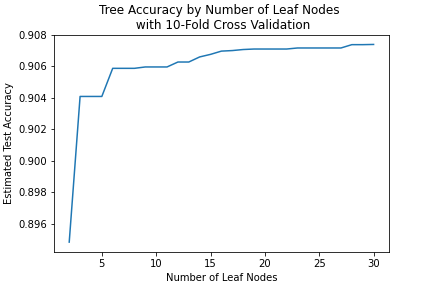

<b>Figure 5: </b>The plot above shows how the estimated test accuracy using 10-fold cross validation changes as a function of the number of leaf nodes the Decision Tree building algorithm was limited to. We can see that around 8 leaf nodes, the estimated test accuracy flattens out at 90.6%. Increasing the leaf nodes further only increases the estimated test accuracy by about 0.2%. I don't think that this small increase in estimated test accuracy warrants an increases in complexity in the decision tree by increasing the number of leaf nodes.

The decision tree created using 8 leaf nodes is shown below:

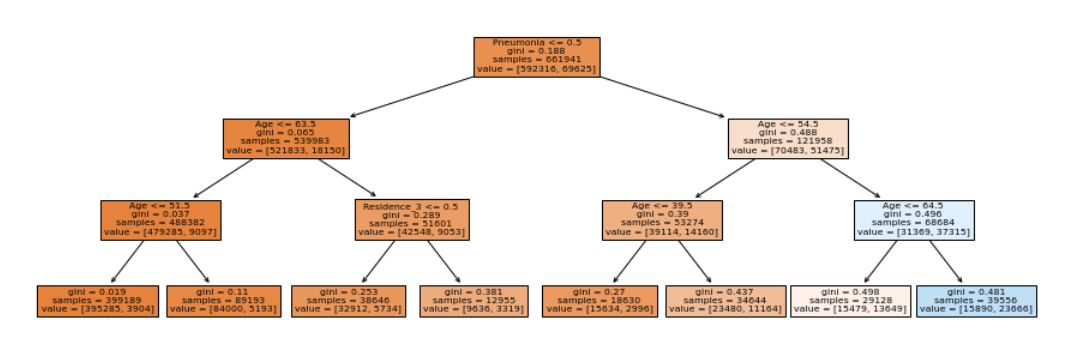

<b>Figure 6: </b>The decision tree above is the result of fitting a tree containing 8 leaf nodes. The tree shows that the only features needed in order to accurately classify a person as dying or not are Pneumonia, Age, and Residence_3. This model seems very simple, and it appears as if many people with other risk factors would likely fall between the cracks.

#### Cost Complexity Pruning

Cost complexity pruning was applied to the tree fitting algorithm by adding an alpha term to the cost function. The alpha value ranges from 0 to 0.007. The trade off between the degree of "pruning" and the impurity and accuracy can be seen in the plot below.

<b>Figure 7: </b>The <b>top plot</b> above shows that as alpha increases, so does the level of total impurity. However, as alpha increases above 0.001, the rate of inrease in impurtiy declines substantially. The <b>middle plot </b> shows how the complexity of the tree in terms of nodes and depth changes as alpha increases. Again, after alpha increases above 0.001, the rate of decrease in complexity falls greatly, and the number of nodes and the depth of the tree flattens out. Lastly, the <b>bottom plot</b> shows how the estimated test accuracy changes as the tree is pruned. The maximum accuracy is found with pruning with alpha between 0.001 and 0.006. The estimated test accuracy is calculated through 10-fold cross validation.

Since the alpha for which the commplexity of the tree flattens is 0.001 and the maximum estimated test accuracy is achieved here, I have chosen this alpha to create a pruned tree. The tree can be see below.

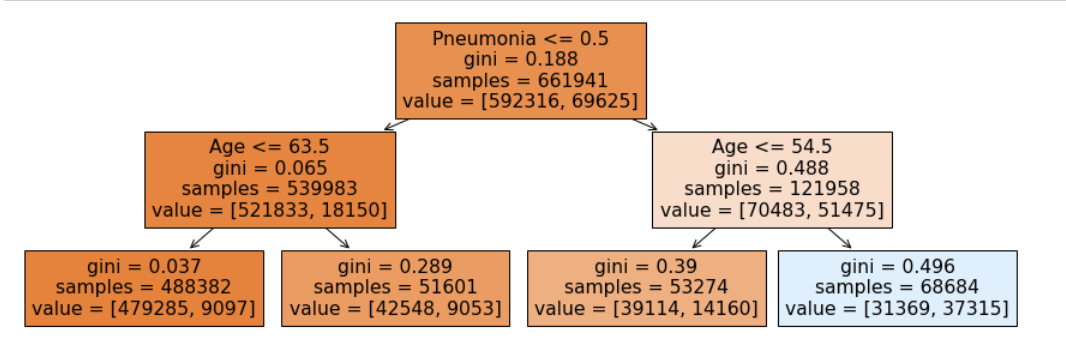

<b>Figure 8: </b>This decision tree shows a great amount of simplicity, only having 4 leaf nodes. The only features necessary in classifying someone as dying or not dying from COVID are Pneumonia and Age.

## Results and Discussion

When choosing between the models, it appears as though the L2 regularized logistic model will be a better model than any of the other considered logist regression models or any of the considered decision tree models. The main reason is that it considers all possible risk factors and has some control over the collinearity in these risk factors. <br>
This model was tested on the test data. The results are shown below in the confusion matrix.

<b>Figure 9: </b> The confusion matrix shows...

## Conclusion and Summary

When choosing between the models, it appears as though the L2 regularized logistic model will be a better model than any of the other considered logist regression models or any of the considered decision tree models. The main reason is that visually, the majority of the risk factors in Figure 1 show some sort of relationship with the outcome of death once tested positive for COVID. Naturally, there is collinearity in these features since someone who is unhealthy usually has more than one

## Limitations and Later Work

One large limitation to this project is that the data is for COVID cases in Mexico. This means it shouldn't be generalized to the United States since there are large differences in the health care systems. This can be seen when comparing the country-wide death rates. The United States is currently sitting at a ~2.8% death rate from COVID in terms of counted cases. However, Mexico is closer to ~10%. This is a large difference that is likely attributed to differences in available health care and average household income (your ability to pay for treatment). However, I am not very familiar with Mexico's health care system so this is only an inference. <br>
In addition, from the visualization notebook, we saw that of all people sent to the Intensive Care Unit, ~50% end up dying. Also, of people that require intubation, ~80% end up dying. These were not included in this analysis because when someone initially gets COVID, they don't know whether or not they will need intubation or intensive care. They only know what their underlying risk factors are. However, what could be very interesting to look into in the future is predicting a death rate for people given their underlying risk factors, given that they are already either in intensive care or are receiving intubation. This could be done by performing similar model experimentation, but starting out with a data set that consists of a subset that only includes people who either required intubation or required intensive care.

## References and Contributions

<b>Author and Data Scientist: </b>David Harper

<b>Language: </b>Python

<b>IDE: </b> Jupyter Notebook via Anaconda

<b>Libraries: </b>pandas, json, numpy, matplotlib, sklearn, and seaborn.